<a href="https://colab.research.google.com/github/FacuNieto/OpenROBi/blob/main/IA/Robi_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Carga de dataset 1️⃣

In [ ]:
#importamos librerias numpy, pandas y matplot 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
#importamos algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report
import joblib
from sklearn.preprocessing import MinMaxScaler
!pip install mplcyberpunk
plt.style.use('dark_background')
import mplcyberpunk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#asociamos drive para carga de dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Cargamos dataset y visualizamos en un dataframe
robi_df=pd.read_excel("/content/drive/MyDrive/5. Robi/Datasets Robi/DATASET_ROBI.xlsx")
display(robi_df)

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw,Angulo,3 franjas,4 franjas
0,12.290716,549.105425,1092.563919,1634.054660,2173.394291,2704.079359,-3846.00,14671.28,3980.62,-4295.11,-874.40,-1232.27,28,0,0
1,24.412208,558.046100,1104.902734,1647.886006,2186.587757,2708.129126,-3442.57,13645.11,4065.02,-4412.86,-767.76,-2332.94,28,0,0
2,36.365329,566.823130,1117.017937,1661.495353,2199.581512,2712.149371,-2785.47,12551.20,4354.72,-3703.44,-1183.50,-2328.45,28,0,0
3,48.150933,575.437618,1128.911021,1674.884014,2212.376672,2716.140166,-2891.49,13116.50,4407.63,-3244.71,-1473.02,-1209.36,28,0,0
4,59.769874,583.890669,1140.583480,1688.053304,2224.974349,2720.101583,-3501.45,14298.05,4189.23,-3597.89,-1289.14,-685.89,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259896,15.475261,544.108699,1104.952133,1622.760387,2164.451207,2699.543156,-990.94,15384.24,2776.91,-4206.64,-2033.49,-2609.28,53,0,0
259897,12.460044,543.307759,1100.067524,1622.213285,2163.563738,2699.627167,-624.15,15927.56,2827.09,-2965.67,-2125.47,-2096.84,53,0,0
259898,9.405118,542.496479,1095.130236,1621.663695,2162.674863,2699.714840,-1603.00,17360.24,2658.49,-3315.41,-2045.34,-2238.39,53,0,0
259899,6.310274,541.674799,1090.140039,1621.111619,2161.784603,2699.806191,-2385.29,17829.45,2500.29,-4462.95,-1801.73,-2722.69,53,0,0


In [ ]:
robi_df.info() # verificar nulls
plt.style.use('dark_background')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259901 entries, 0 to 259900
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DeltMed     259901 non-null  float64
 1   DeltFront   259901 non-null  float64
 2   Biceps      259901 non-null  float64
 3   Flex_Muñe   259901 non-null  float64
 4   Flex_Dedos  259901 non-null  float64
 5   Prona       259901 non-null  float64
 6   can1raw     259901 non-null  float64
 7   can2raw     259901 non-null  float64
 8   can3raw     259901 non-null  float64
 9   can4raw     259901 non-null  float64
 10  can5raw     259901 non-null  float64
 11  can6raw     259901 non-null  float64
 12  Angulo      259901 non-null  int64  
 13  3 franjas   259901 non-null  int64  
 14  4 franjas   259901 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 29.7 MB


In [ ]:
robi_df.groupby('3 franjas').count()

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw,Angulo,4 franjas
3 franjas,,,,,,,,,,,,,,
0,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675,111675
1,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863,60863
2,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363,87363


In [ ]:
envolventes=robi_df[['DeltMed','DeltFront','Biceps','Flex_Muñe','Flex_Dedos','Prona']]
crudas=robi_df[['can1raw',	'can2raw',	'can3raw',	'can4raw',	'can5raw',	'can6raw']]
completo=robi_df.drop(['Angulo',	'3 franjas',	'4 franjas'], axis=1)
display(envolventes,crudas,completo)

,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona
0,12.290716,549.105425,1092.563919,1634.054660,2173.394291,2704.079359
1,24.412208,558.046100,1104.902734,1647.886006,2186.587757,2708.129126
2,36.365329,566.823130,1117.017937,1661.495353,2199.581512,2712.149371
3,48.150933,575.437618,1128.911021,1674.884014,2212.376672,2716.140166
4,59.769874,583.890669,1140.583480,1688.053304,2224.974349,2720.101583
...,...,...,...,...,...,...
259896,15.475261,544.108699,1104.952133,1622.760387,2164.451207,2699.543156
259897,12.460044,543.307759,1100.067524,1622.213285,2163.563738,2699.627167
259898,9.405118,542.496479,1095.130236,1621.663695,2162.674863,2699.714840
259899,6.310274,541.674799,1090.140039,1621.111619,2161.784603,2699.806191


,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,-3846.00,14671.28,3980.62,-4295.11,-874.40,-1232.27
1,-3442.57,13645.11,4065.02,-4412.86,-767.76,-2332.94
2,-2785.47,12551.20,4354.72,-3703.44,-1183.50,-2328.45
3,-2891.49,13116.50,4407.63,-3244.71,-1473.02,-1209.36
4,-3501.45,14298.05,4189.23,-3597.89,-1289.14,-685.89
...,...,...,...,...,...,...
259896,-990.94,15384.24,2776.91,-4206.64,-2033.49,-2609.28
259897,-624.15,15927.56,2827.09,-2965.67,-2125.47,-2096.84
259898,-1603.00,17360.24,2658.49,-3315.41,-2045.34,-2238.39
259899,-2385.29,17829.45,2500.29,-4462.95,-1801.73,-2722.69


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,12.290716,549.105425,1092.563919,1634.054660,2173.394291,2704.079359,-3846.00,14671.28,3980.62,-4295.11,-874.40,-1232.27
1,24.412208,558.046100,1104.902734,1647.886006,2186.587757,2708.129126,-3442.57,13645.11,4065.02,-4412.86,-767.76,-2332.94
2,36.365329,566.823130,1117.017937,1661.495353,2199.581512,2712.149371,-2785.47,12551.20,4354.72,-3703.44,-1183.50,-2328.45
3,48.150933,575.437618,1128.911021,1674.884014,2212.376672,2716.140166,-2891.49,13116.50,4407.63,-3244.71,-1473.02,-1209.36
4,59.769874,583.890669,1140.583480,1688.053304,2224.974349,2720.101583,-3501.45,14298.05,4189.23,-3597.89,-1289.14,-685.89
...,...,...,...,...,...,...,...,...,...,...,...,...
259896,15.475261,544.108699,1104.952133,1622.760387,2164.451207,2699.543156,-990.94,15384.24,2776.91,-4206.64,-2033.49,-2609.28
259897,12.460044,543.307759,1100.067524,1622.213285,2163.563738,2699.627167,-624.15,15927.56,2827.09,-2965.67,-2125.47,-2096.84
259898,9.405118,542.496479,1095.130236,1621.663695,2162.674863,2699.714840,-1603.00,17360.24,2658.49,-3315.41,-2045.34,-2238.39
259899,6.310274,541.674799,1090.140039,1621.111619,2161.784603,2699.806191,-2385.29,17829.45,2500.29,-4462.95,-1801.73,-2722.69


In [ ]:
# Aplicamos MinMaxScaler a la data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(envolventes))
robi_df_escal_env=pd.DataFrame(scaler.transform(envolventes),
                           columns=envolventes.columns)
print(scaler.fit(crudas))
robi_df_escal_crudo=pd.DataFrame(scaler.transform(crudas),
                           columns=crudas.columns)
print(scaler.fit(completo))
robi_df_escal_completo=pd.DataFrame(scaler.transform(completo),
                           columns=completo.columns)
display(robi_df_escal_env,robi_df_escal_crudo,robi_df_escal_completo)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona
0,0.247748,0.208665,0.178718,0.164989,0.168876,0.171864
1,0.265351,0.232010,0.203682,0.187489,0.190010,0.182273
2,0.282709,0.254928,0.228194,0.209627,0.210825,0.192606
3,0.299825,0.277422,0.252256,0.231407,0.231322,0.202863
4,0.316698,0.299493,0.275873,0.252830,0.251502,0.213044
...,...,...,...,...,...,...
259896,0.252372,0.195618,0.203782,0.146616,0.154550,0.160205
259897,0.247994,0.193527,0.193899,0.145726,0.153128,0.160421
259898,0.243557,0.191409,0.183910,0.144832,0.151704,0.160646
259899,0.239063,0.189263,0.173814,0.143934,0.150278,0.160881


,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,0.259546,0.562185,0.635017,0.333882,0.749379,0.496714
1,0.296044,0.559331,0.642612,0.322341,0.782175,0.493779
2,0.355491,0.556289,0.668678,0.391876,0.654318,0.493791
3,0.345900,0.557861,0.673439,0.436839,0.565279,0.496775
4,0.290717,0.561147,0.653788,0.402221,0.621829,0.498171
...,...,...,...,...,...,...
259896,0.517842,0.564167,0.526709,0.342554,0.392911,0.493042
259897,0.551025,0.565678,0.531224,0.464190,0.364624,0.494408
259898,0.462469,0.569662,0.516054,0.429909,0.389267,0.494031
259899,0.391696,0.570967,0.501819,0.317431,0.464187,0.492740


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
0,0.247748,0.208665,0.178718,0.164989,0.168876,0.171864,0.259546,0.562185,0.635017,0.333882,0.749379,0.496714
1,0.265351,0.232010,0.203682,0.187489,0.190010,0.182273,0.296044,0.559331,0.642612,0.322341,0.782175,0.493779
2,0.282709,0.254928,0.228194,0.209627,0.210825,0.192606,0.355491,0.556289,0.668678,0.391876,0.654318,0.493791
3,0.299825,0.277422,0.252256,0.231407,0.231322,0.202863,0.345900,0.557861,0.673439,0.436839,0.565279,0.496775
4,0.316698,0.299493,0.275873,0.252830,0.251502,0.213044,0.290717,0.561147,0.653788,0.402221,0.621829,0.498171
...,...,...,...,...,...,...,...,...,...,...,...,...
259896,0.252372,0.195618,0.203782,0.146616,0.154550,0.160205,0.517842,0.564167,0.526709,0.342554,0.392911,0.493042
259897,0.247994,0.193527,0.193899,0.145726,0.153128,0.160421,0.551025,0.565678,0.531224,0.464190,0.364624,0.494408
259898,0.243557,0.191409,0.183910,0.144832,0.151704,0.160646,0.462469,0.569662,0.516054,0.429909,0.389267,0.494031
259899,0.239063,0.189263,0.173814,0.143934,0.150278,0.160881,0.391696,0.570967,0.501819,0.317431,0.464187,0.492740


Visualización

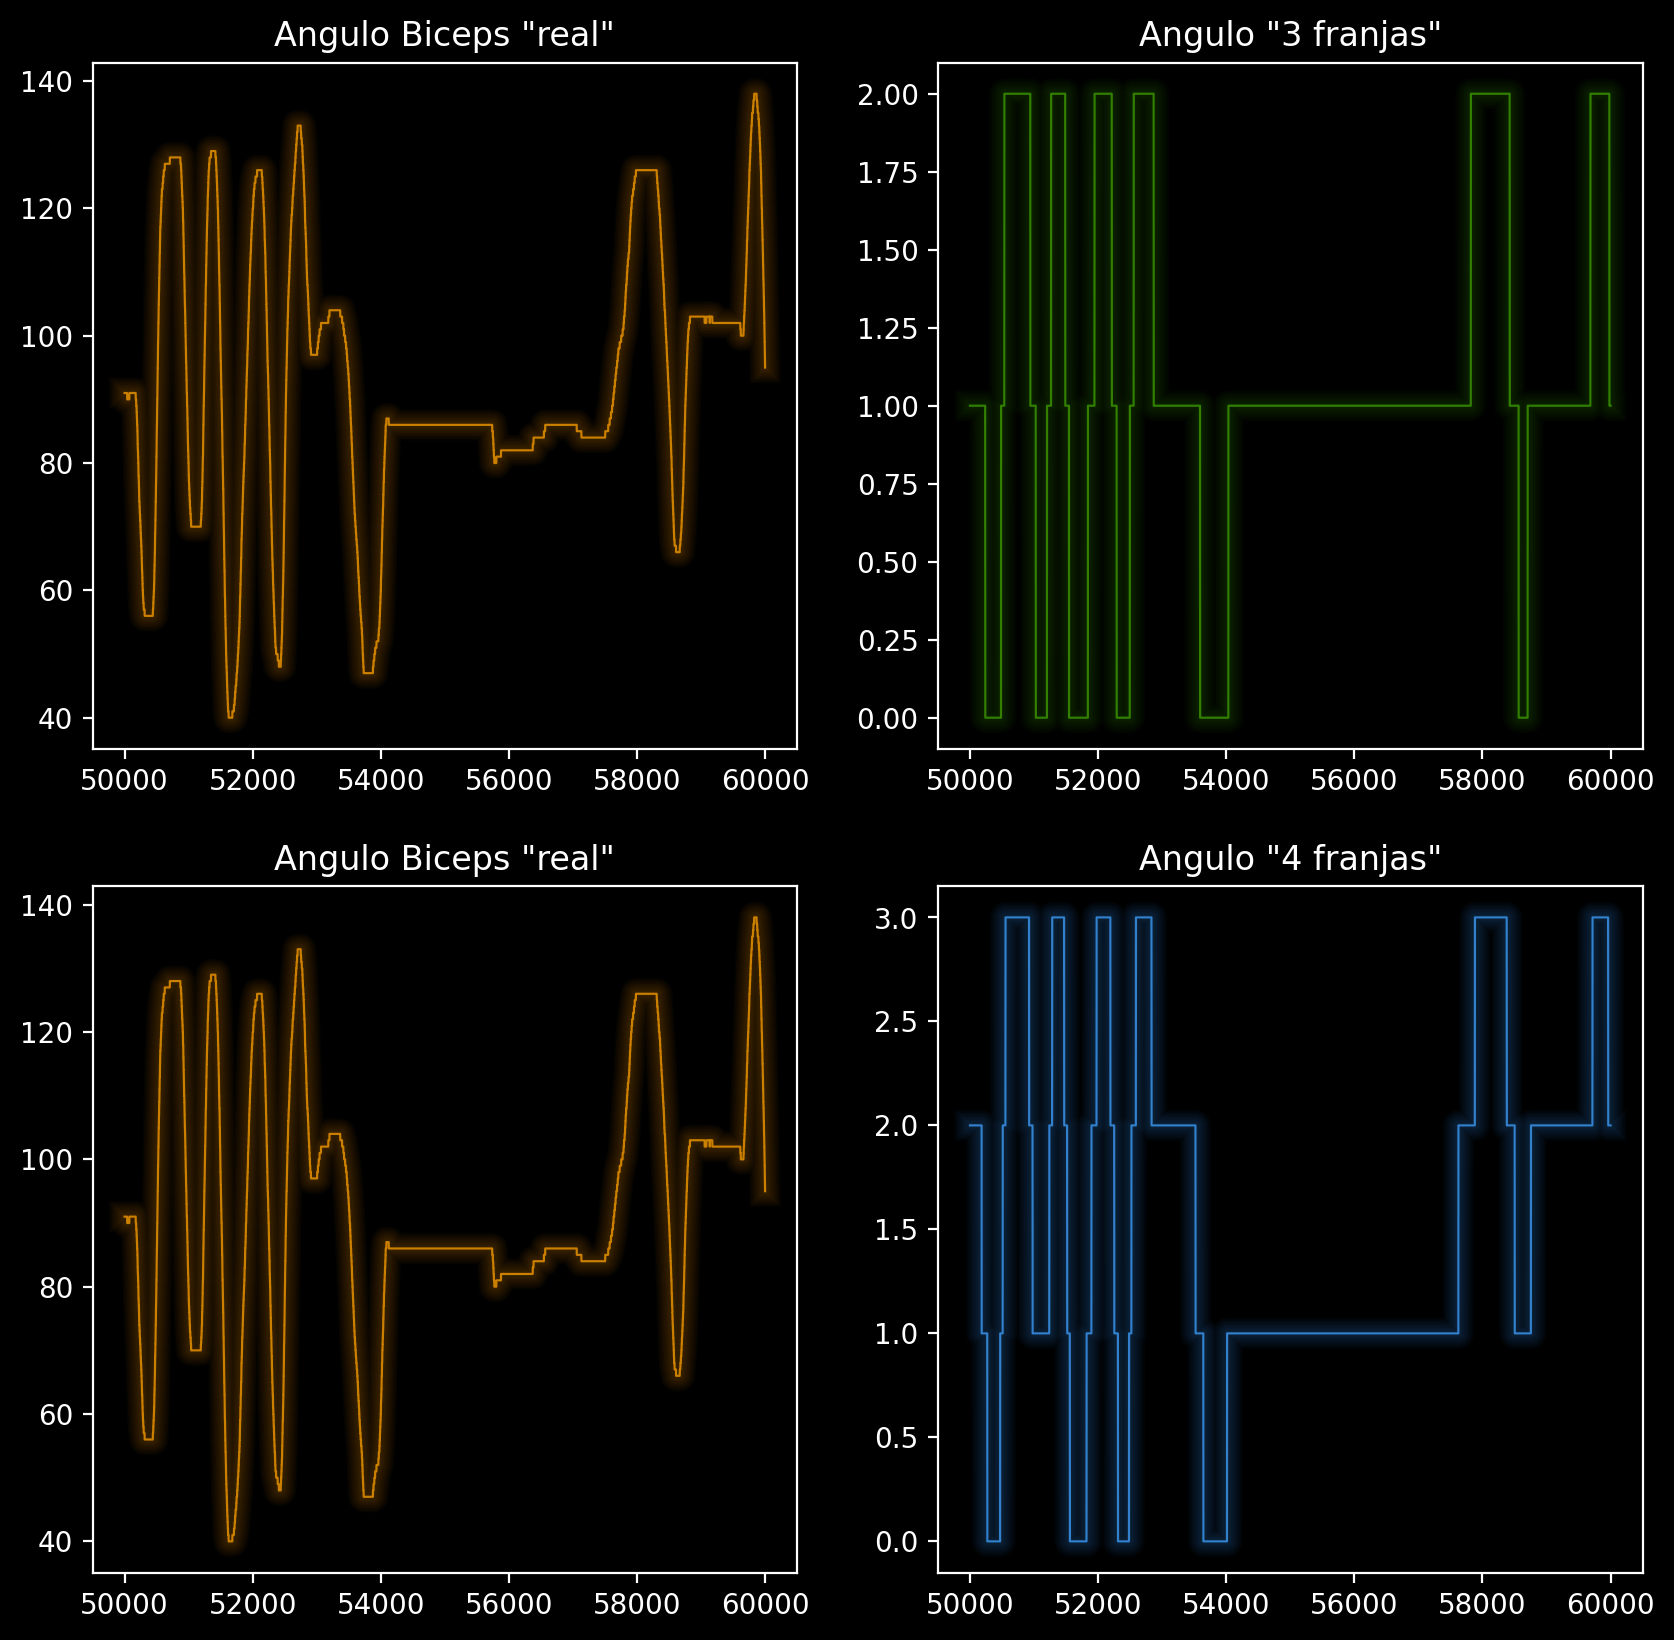

CPU times: user 926 ms, sys: 11.4 ms, total: 938 ms
Wall time: 935 ms


In [ ]:
%%time
plt.rcParams["figure.dpi"] = 200

plt.figure(figsize=(10,10))
limi_i=50000
limi_s=60000
plt.subplot(221)
plt.title('Angulo Biceps "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(222)
plt.title('Angulo "3 franjas"')
plt.plot(robi_df['3 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.2,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(223)
plt.title('Angulo Biceps "real"')
plt.plot(robi_df['Angulo'][limi_i:limi_s],linewidth=0.8, color=(0.8,0.5,0,1))
mplcyberpunk.make_lines_glow()

plt.subplot(224)
plt.title('Angulo "4 franjas"')
plt.plot(robi_df['4 franjas'][limi_i:limi_s],linewidth=0.8, color=(0.2,0.5,0.8,1))
mplcyberpunk.make_lines_glow()
# plt.subplot(133)
# plt.title('Clasificación')
# y_pred_randomforest=rfc.predict(x[140000:150000])
# plt.plot(y_pred_randomforest,linewidth=0.8, color=(0,0.5,0.8,1))
# mplcyberpunk.make_lines_glow()
plt.show()

In [ ]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

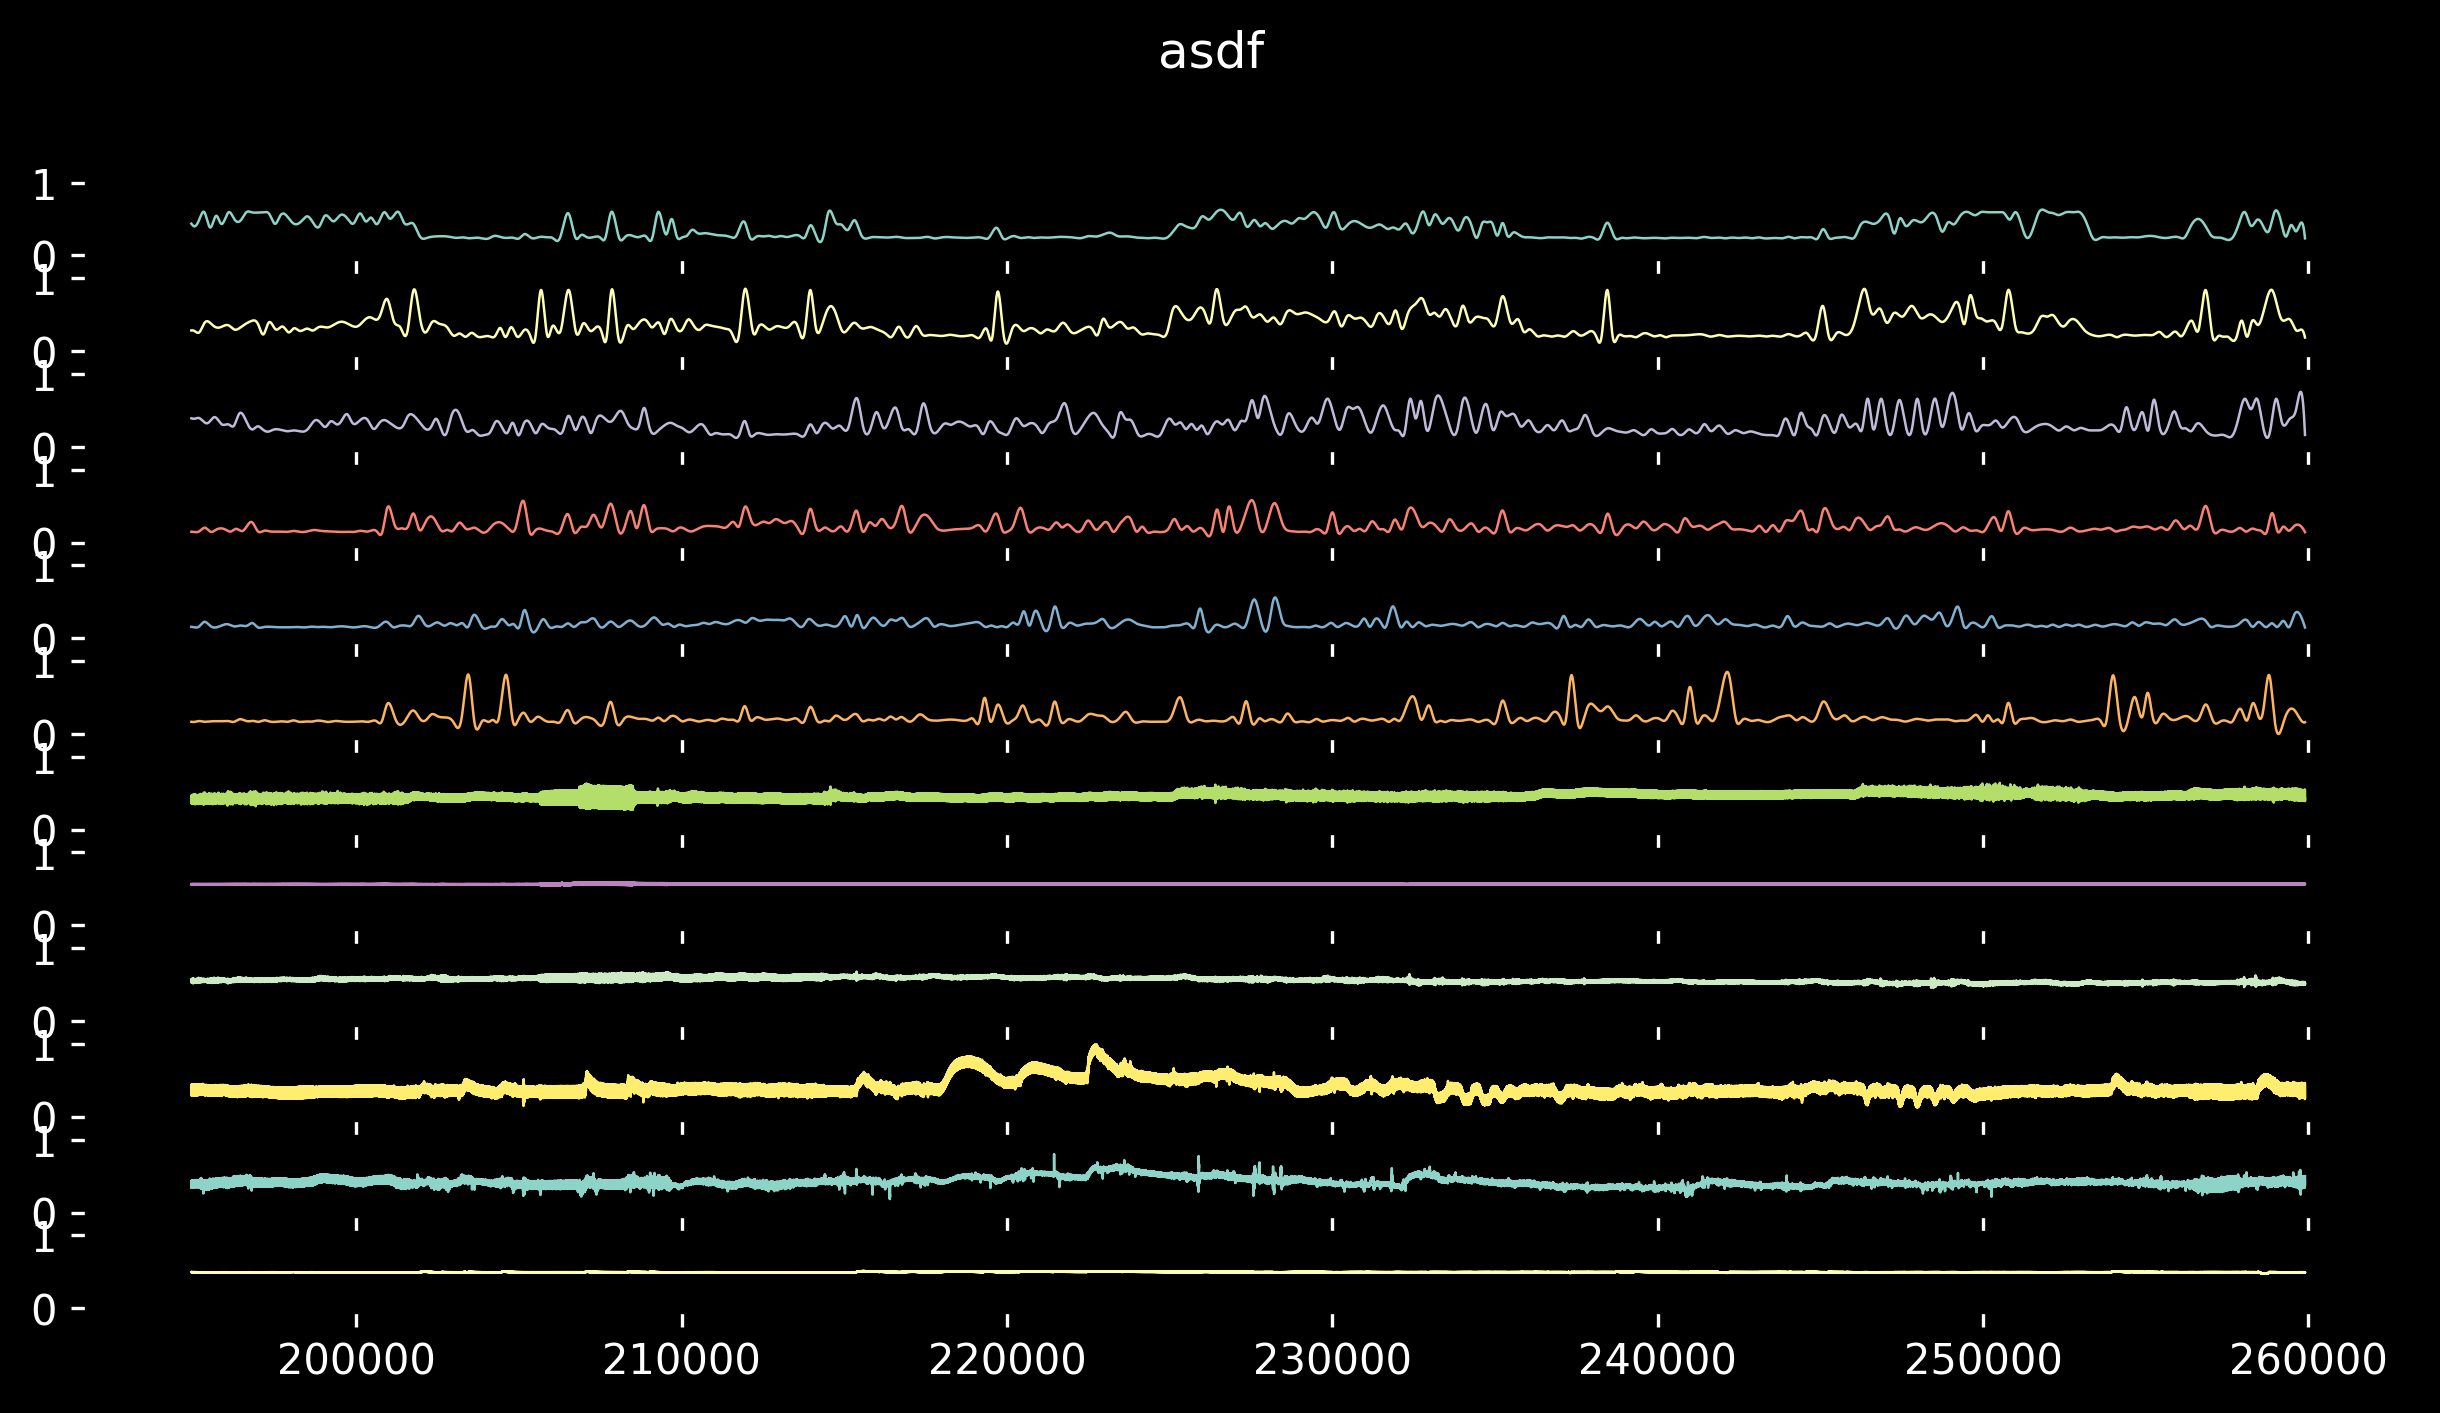

In [ ]:
#visualización

# plt.style.use('dark_background')
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

index= np.arange(0,len(robi_df_escal_completo),1) #index=el rango que queremos visualizar
plt.rcParams["figure.dpi"] = 300 #calidad de imagen
plt.close('all')
plt.rcParams["axes.edgecolor"] = 'black' #calidad de imagen
plt.rcParams["legend.loc"] = 'right' #calidad de imagen


robi_df_escal_completo[194925:].plot(figsize=(10,5),linewidth=0.6,title='asdf',sharex=True, sharey=True,legend=False,subplots=True)
#posición de los nombres
# plt.savefig('asdf.png') #guardamos
plt.show()

In [ ]:
# robi_df_escal_completo_and=robi_df_escal_completo
# robi_df_escal_completo_and['3 franjas']=robi_df['3 franjas']
# # display(robi_df_escal_completo_and)

In [ ]:
#Generamos un andrews plot 
# fig = plt.figure(figsize = (25, 8))
# pd.plotting.andrews_curves(robi_df_escal_completo_and,'3 franjas')
# plt.show()

In [ ]:
# #Generamos un grafico de coordenadas paralelas.
# fig = plt.figure(figsize = (25, 8))
# pd.plotting.parallel_coordinates(robi_df_escal_completo_and,'3 franjas')
# plt.show()

# 2 ROBI MLP

## 2.1 Implementación directa

### 2.1.1 Modelo

In [ ]:
import tensorflow as tf
from tensorflow import Tensor
import numpy as np

In [ ]:
x= robi_df_escal_completo
y= robi_df['3 franjas']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=0)

x_train.shape

(194925, 12)

In [ ]:
#aca vamos a armar la red kemosioon
model_MLP1 = tf.keras.models.Sequential([tf.keras.layers.Dense(512, activation=tf.nn.relu),  
                                    tf.keras.layers.Dropout(0.2),                                    
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.1),                                    
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(3,activation=tf.nn.softmax)]
                                    )

In [ ]:
model_MLP1.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
# model.summary()

In [ ]:
history=model_MLP1.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test)) # steps_per_epoch=200

Epoch 1/50
6092/6092 [==============================] - 40s 6ms/step - loss: 0.8516 - accuracy: 0.6024 - val_loss: 0.7491 - val_accuracy: 0.6630
Epoch 2/50
6092/6092 [==============================] - 39s 6ms/step - loss: 0.7376 - accuracy: 0.6710 - val_loss: 0.6502 - val_accuracy: 0.7216
Epoch 3/50
6092/6092 [==============================] - 39s 6ms/step - loss: 0.6617 - accuracy: 0.7129 - val_loss: 0.6041 - val_accuracy: 0.7418
Epoch 4/50
6092/6092 [==============================] - 39s 6ms/step - loss: 0.6049 - accuracy: 0.7429 - val_loss: 0.5288 - val_accuracy: 0.7827
Epoch 5/50
6092/6092 [==============================] - 41s 7ms/step - loss: 0.5594 - accuracy: 0.7642 - val_loss: 0.4794 - val_accuracy: 0.8044
Epoch 6/50
6092/6092 [==============================] - 40s 7ms/step - loss: 0.5212 - accuracy: 0.7832 - val_loss: 0.4148 - val_accuracy: 0.8378
Epoch 7/50
6092/6092 [==============================] - 41s 7ms/step - loss: 0.4918 - accuracy: 0.7959 - val_loss: 0.3842 - val_ac

In [ ]:
model_MLP1.evaluate(x_test,y_test)

2031/2031 [==============================] - 5s 2ms/step - loss: 0.1143 - accuracy: 0.9593


[0.1142534539103508, 0.9593080282211304]

In [ ]:
model_MLP1.save("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_DNN_sinconv.h5")

In [ ]:
model_MLP1 = tf.keras.models.load_model("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_DNN_sinconv.h5")
model_MLP1.evaluate(x_test,y_test)

2031/2031 [==============================] - 8s 4ms/step - loss: 0.1143 - accuracy: 0.9593


[0.1142534539103508, 0.9593080282211304]

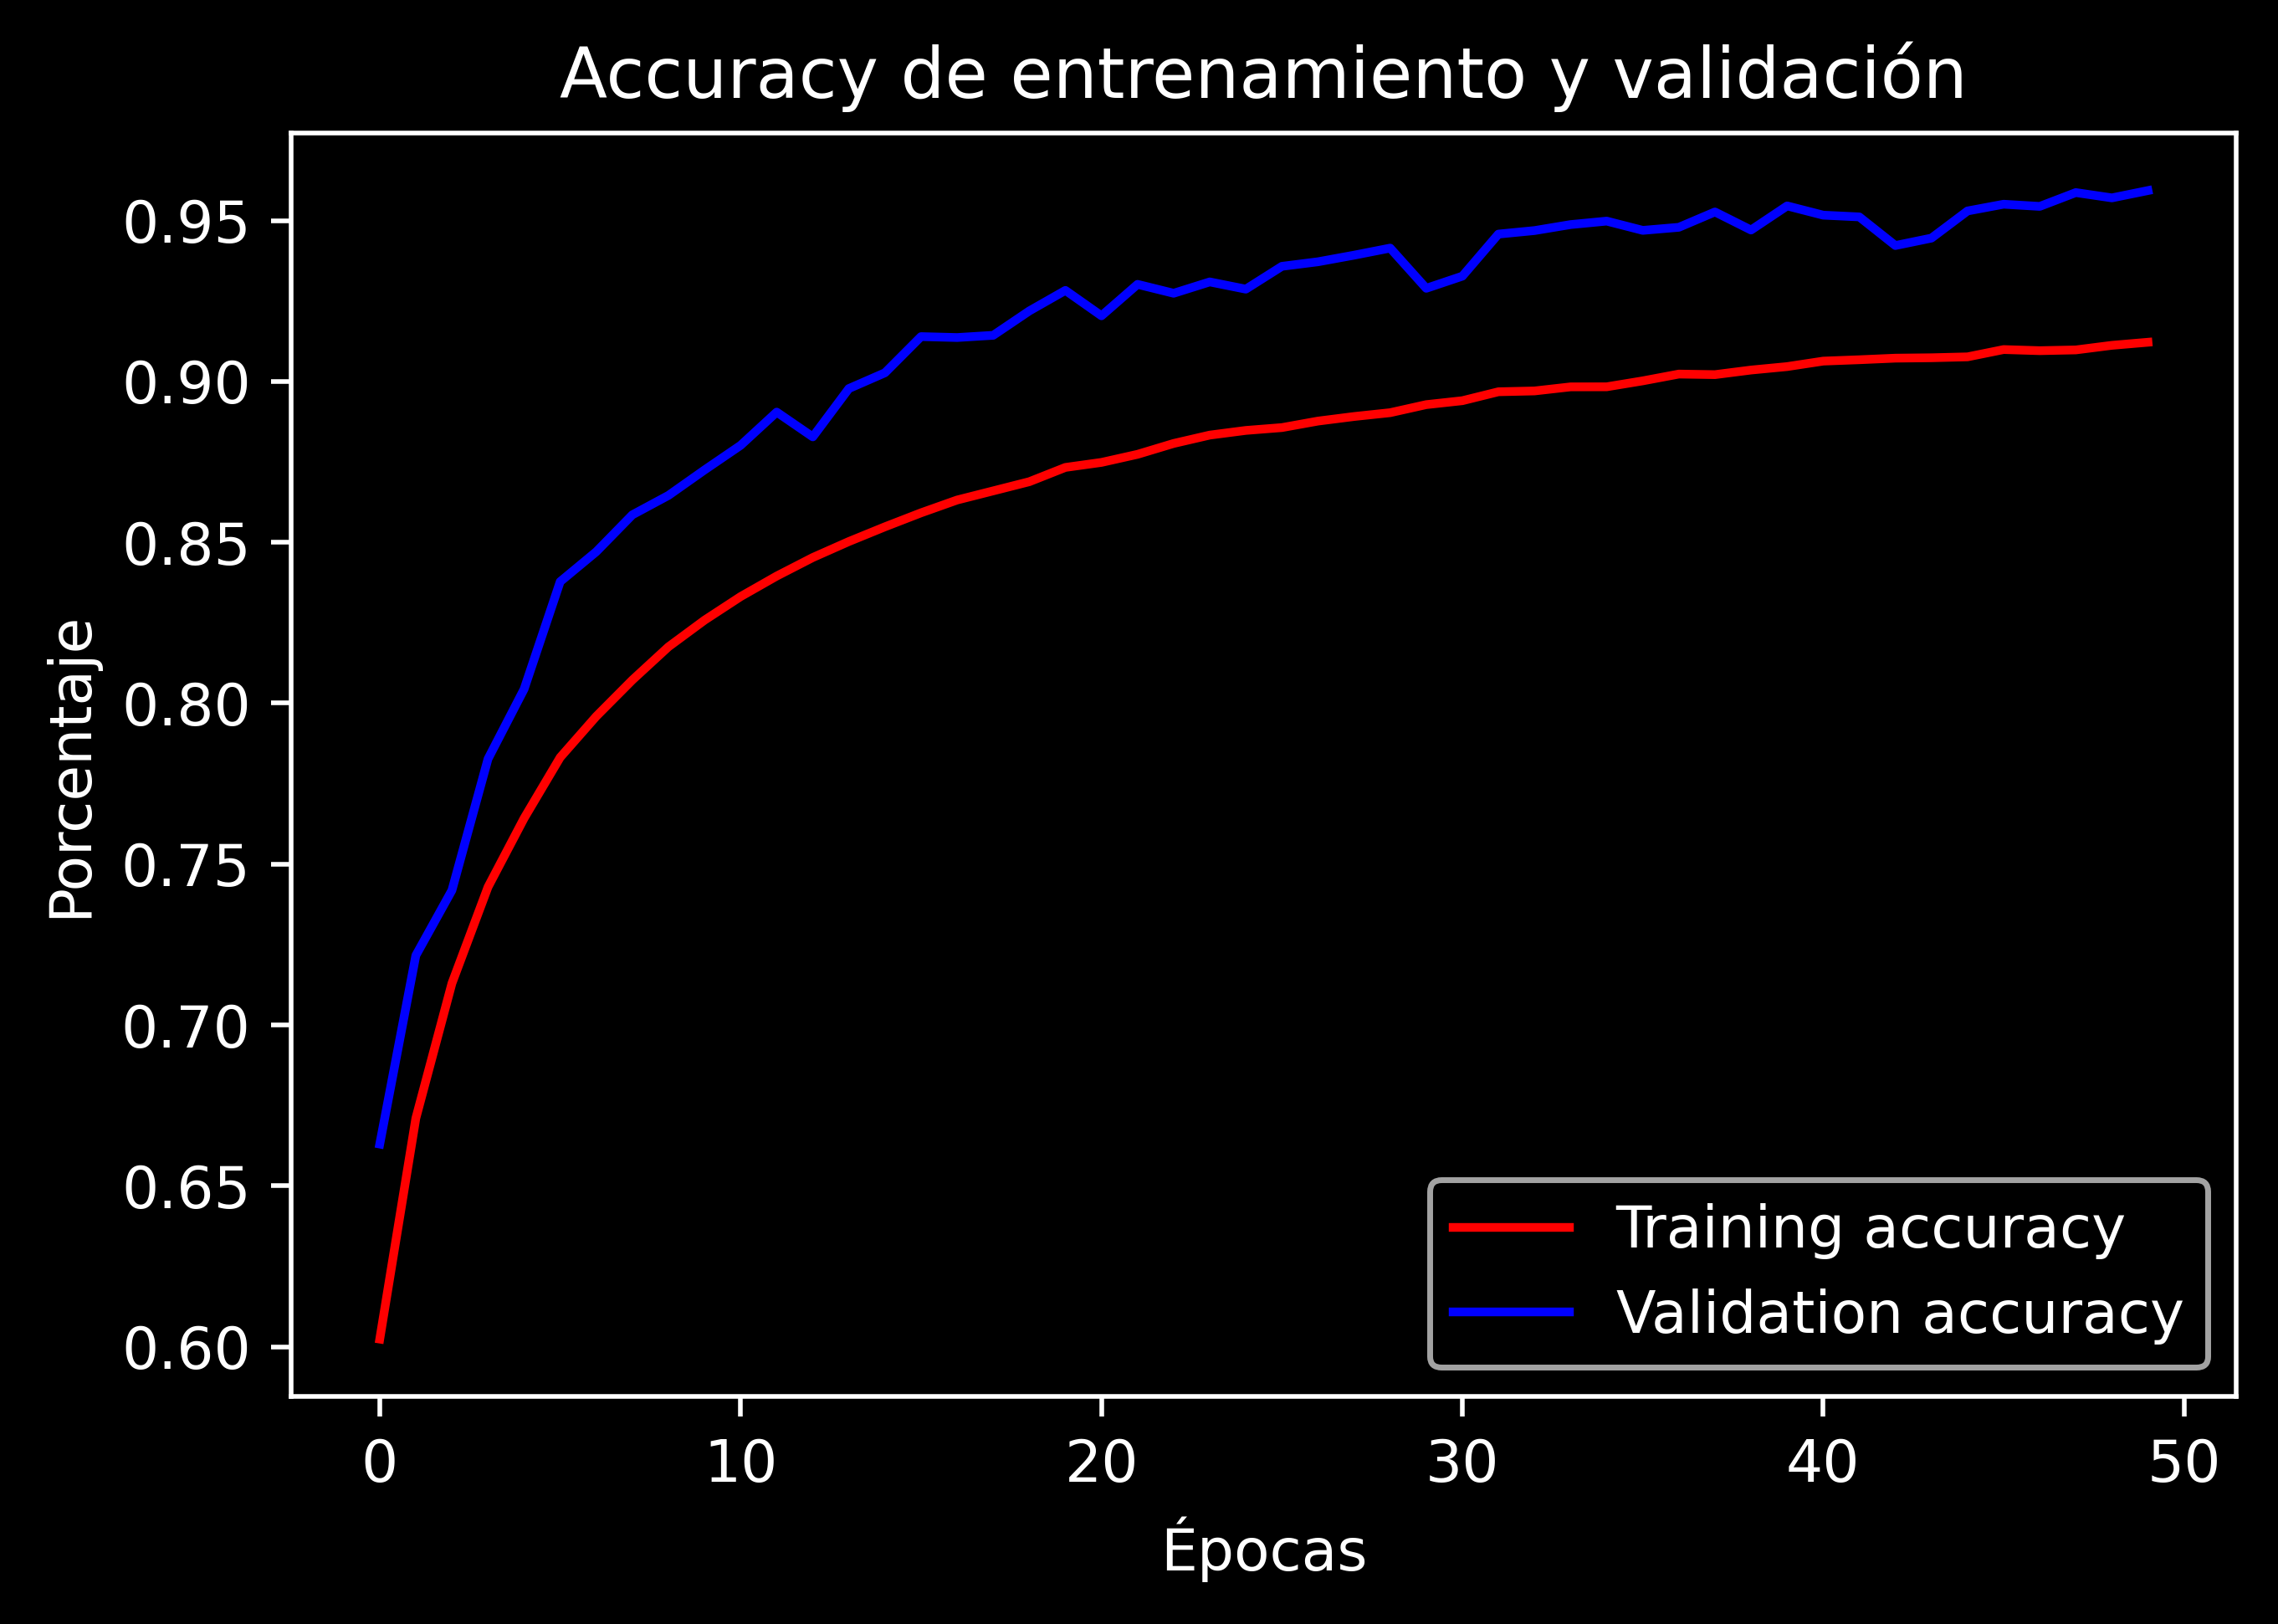

<Figure size 3000x2000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Porcentaje')

plt.legend(loc=0)
plt.figure()

plt.show()

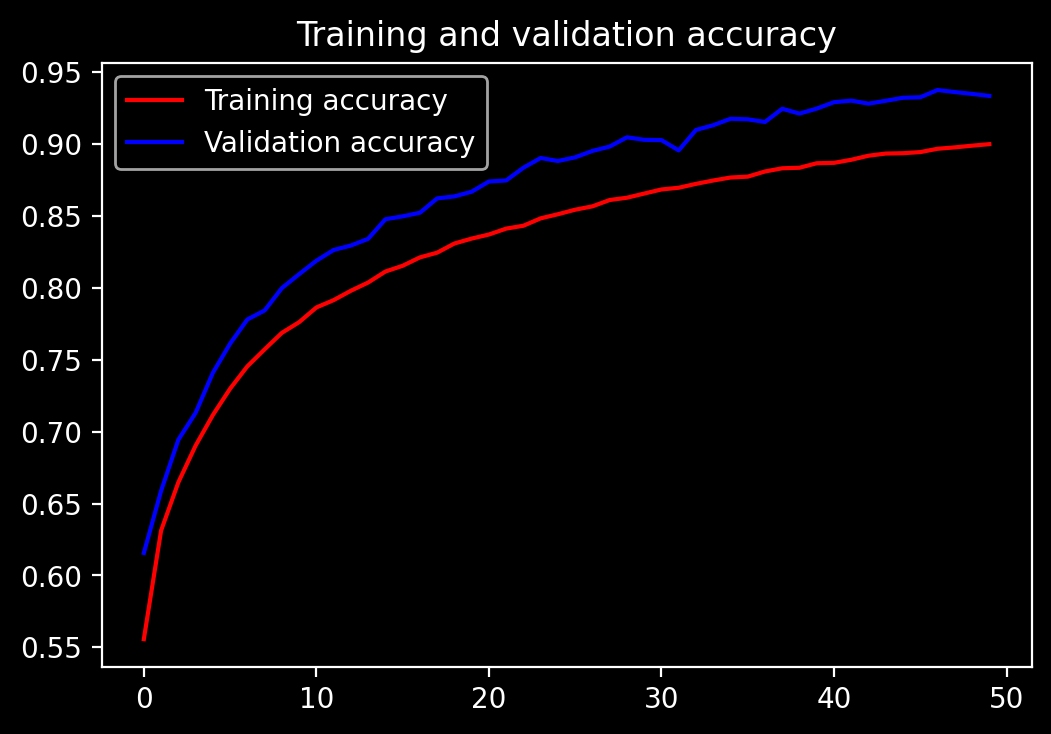

In [ ]:
%%time
print(x_test[120:121].shape)
display(x_test[120:121]) 
# model.predict(x_test[120:121])
# print(model.predict(x_test[120:121]))
# print(np.array(y_test)[120])

(1, 12)


,DeltMed,DeltFront,Biceps,Flex_Muñe,Flex_Dedos,Prona,can1raw,can2raw,can3raw,can4raw,can5raw,can6raw
173996,0.24222,0.226565,0.24798,0.163903,0.164651,0.186039,0.480512,0.561449,0.632532,0.392555,0.421168,0.493874


CPU times: user 24.2 ms, sys: 1.14 ms, total: 25.3 ms
Wall time: 62.8 ms


In [ ]:
# Tensorboard
%reload_ext tensorboard

# %load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
x_prueba=robi_df_escal_completo[45000:48000]
x_prueba_array=np.array(x_prueba)
x_prueba_array=x_prueba_array.reshape(3000,12)
x_train1, x_test1 ,y_train1, y_test1 = train_test_split( x , y , random_state=None, shuffle=False)


### 2.1.2 Clasificación


In [ ]:
# #Vamos a predecir y almacenar la predicciones en ORDEN
lim_inf=31500
lim_sup=33500
x= robi_df_escal_completo
y= robi_df['3 franjas']
x_train1, x_test1 ,y_train1, y_test1 = train_test_split( x , y , random_state=None, shuffle=False)
salidareal= y_test1[lim_inf:lim_sup]
forecast = []
a=lim_inf 

for time in range(lim_sup-lim_inf):
  # a=45000+time
  forecast.append(model_MLP1.predict(x_test1[a+time:a+1+time]).argmax())
  # print(len(a))
# model.predict(x_train[a:a+1])

# x_train=x_train.reshape(194925,12,1)

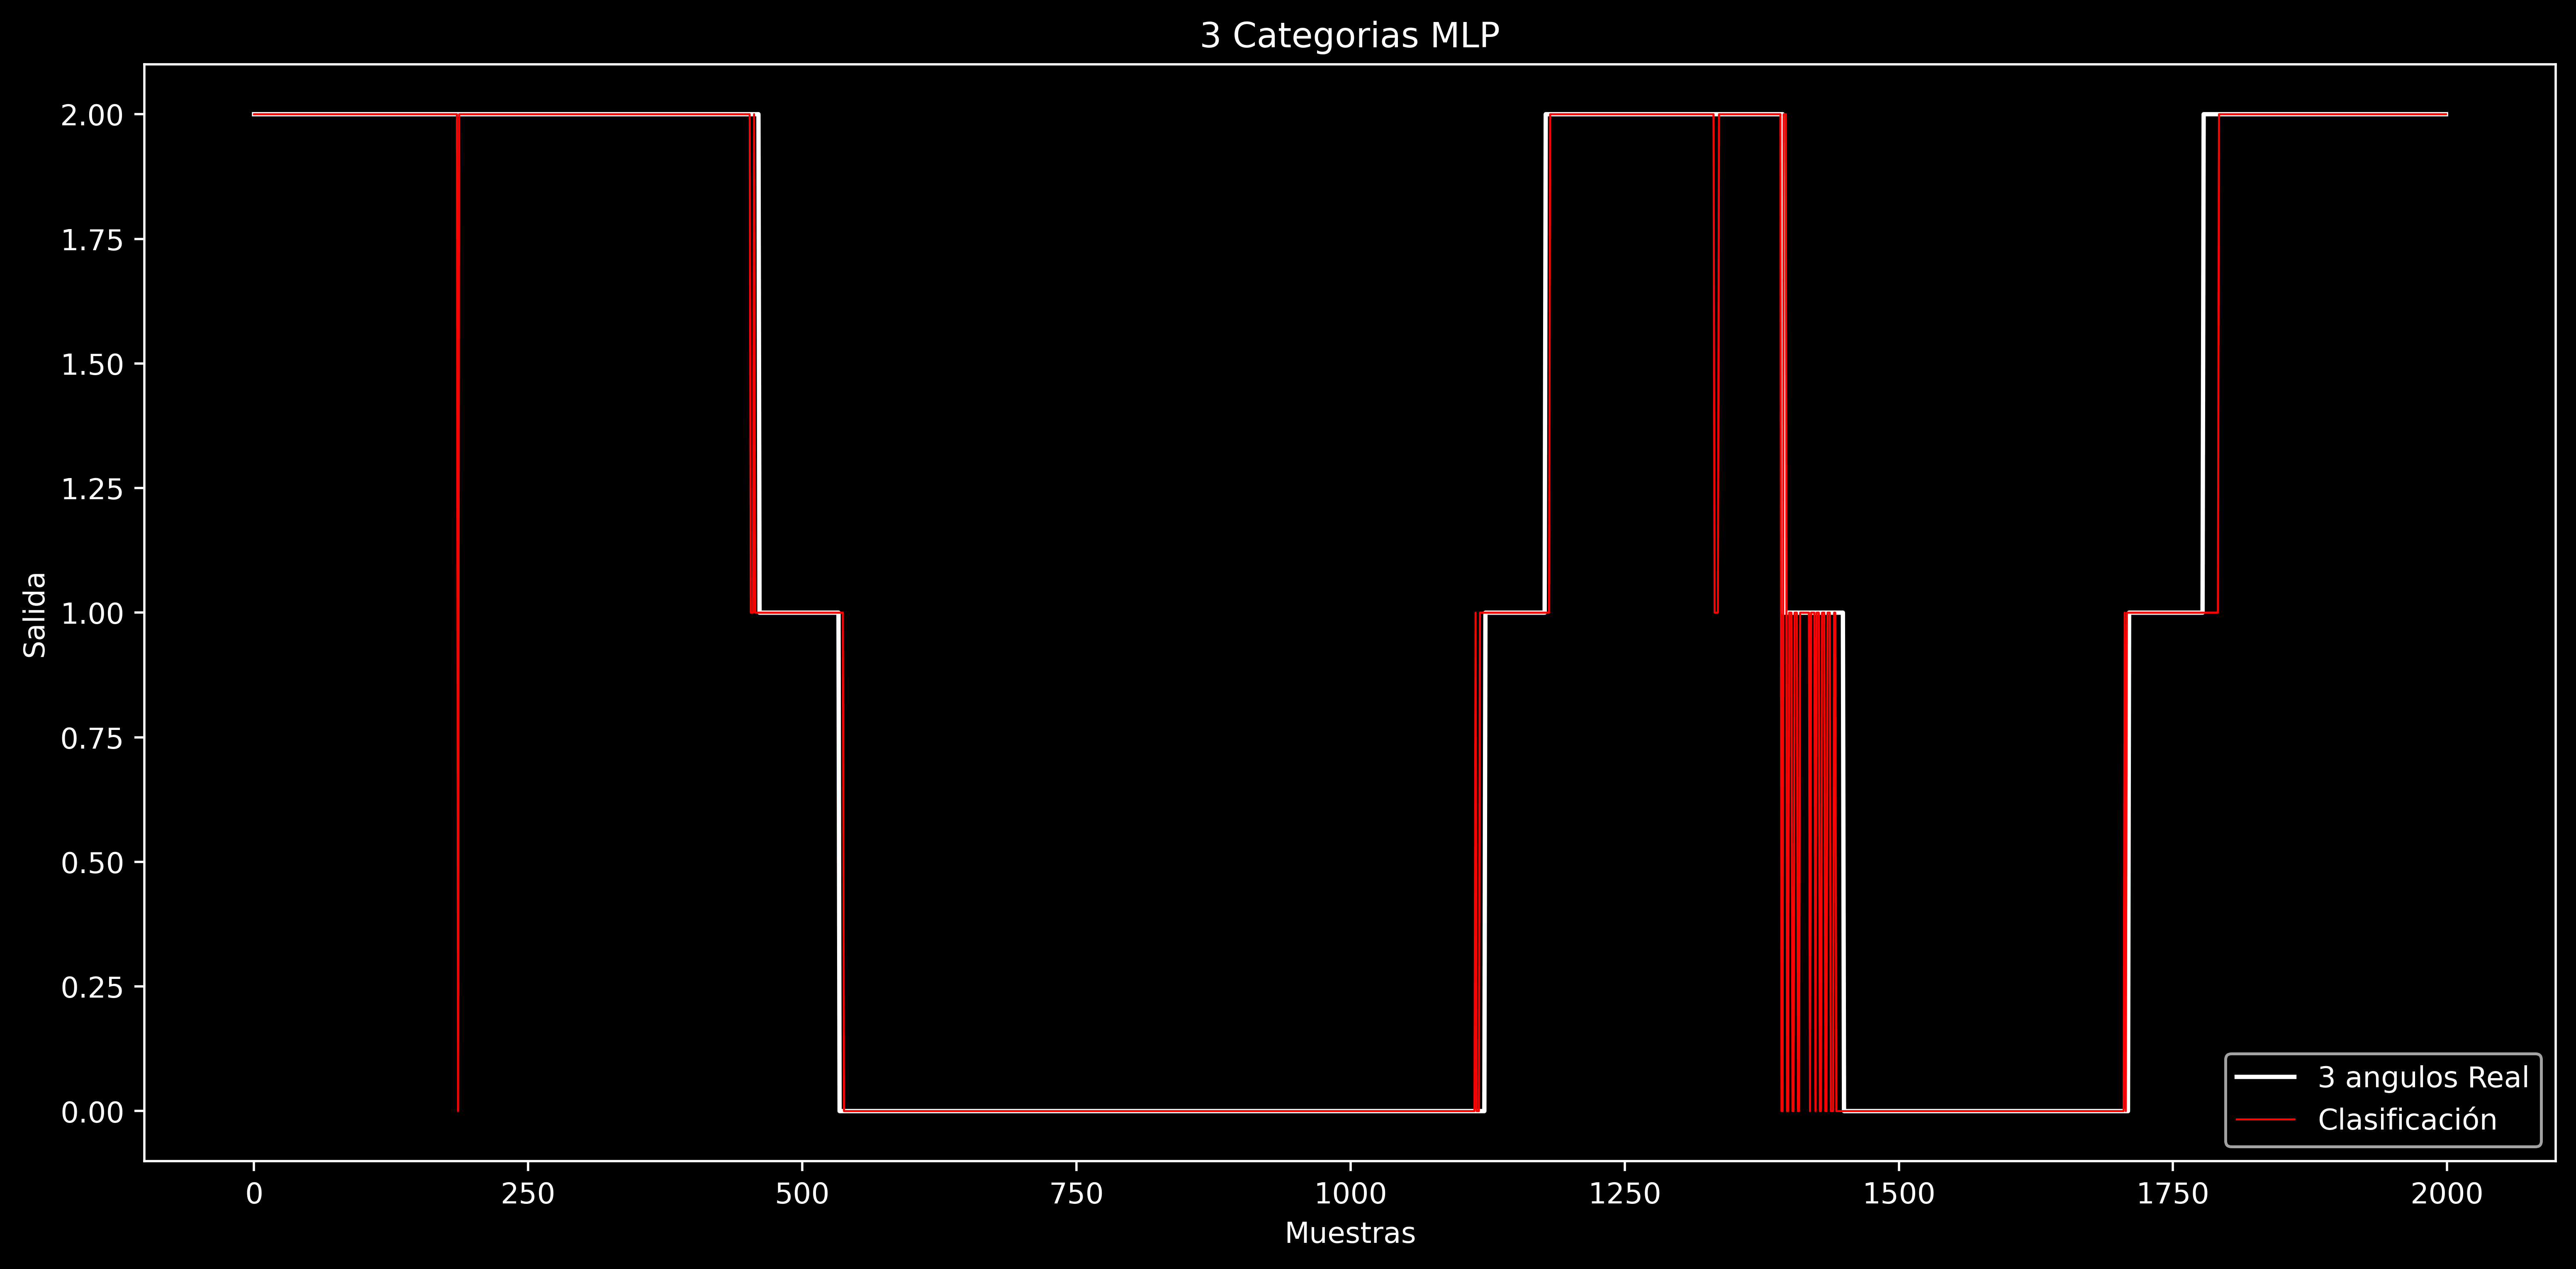

In [ ]:
# Graficar serie + predicción
# for f in forecast:
#   f.squeeze() 
# fore=np.array(forecast)
#disminuimos dimensión
# plot_series(time_valid, (x_valid, results))
# plt.plot(fore)
# plt.show()
# forecast[4]

plt.rcParams["figure.dpi"] = 500 #calidad de imagen


prediccion=np.array(forecast,dtype=float)
plt.figure(figsize=(15,7))
# plt.subplot(121)
plt.xlabel('Muestras')
plt.ylabel('Salida')
plt.title('3 Categorias MLP')

plt.plot(np.arange(0,lim_sup-lim_inf,1),salidareal,color='w', label='3 angulos Real')


# plt.subplot(122)
# plt.title('Regresión')
plt.plot(prediccion,color='r',linewidth=0.7, label= 'Clasificación')
plt.legend(loc=0)

plt.show()

In [ ]:
# %%time
import time

start_time = time.process_time ()

with tf.device('/device:GPU:0'):
  model_MLP1.predict(x_test1[5:6])

print(time.process_time () - start_time, "seconds con GPU")

start_time = time.process_time ()

with tf.device('/device:CPU:0'):
  model_MLP1.predict(x_test1[5:6])

print(time.process_time () - start_time, "seconds con CPU")

0.061290292999956364 seconds con GPU
0.060284371999841824 seconds con CPU


## 2.2 Con convo 1d!

### 2.2.1 Modelo 

In [ ]:
x= robi_df_escal_completo
y= robi_df['3 franjas']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=0)

x_train.shape

(194925, 12)

In [ ]:
x_train=np.array(x_train)
x_train=x_train.reshape(194925,12,1)
# .reshape(194925,12,1)
x_test=np.array(x_test)
x_test=x_test.reshape(64976,12,1)

x_train.shape

(194925, 12, 1)

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
#aca vamos a armar la red kemosioon
from tensorflow.keras.layers import Dense, BatchNormalization

model_MLP_CNN = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=10,kernel_size=5),  
                                    tf.keras.layers.Flatten(),  
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),  
                                    # BatchNormalization(),
                                    tf.keras.layers.Dropout(0.1),                                    
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    # BatchNormalization(),
                                    tf.keras.layers.Dropout(0.1),                                    
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    # BatchNormalization(),
                                    tf.keras.layers.Dense(3,activation=tf.nn.softmax)]
                                    )

In [ ]:
# model.summary()


In [ ]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # para tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # para tensorboard 

model_MLP_CNN.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model_MLP_CNN.fit(x_train, y_train, epochs=50,  callbacks=[tensorboard_callback],validation_data=(x_test,y_test))

Epoch 1/50
6092/6092 [==============================] - 73s 12ms/step - loss: 0.7401 - accuracy: 0.6690 - val_loss: 0.5583 - val_accuracy: 0.7681
Epoch 2/50
6092/6092 [==============================] - 73s 12ms/step - loss: 0.5226 - accuracy: 0.7839 - val_loss: 0.4135 - val_accuracy: 0.8367
Epoch 3/50
6092/6092 [==============================] - 45s 7ms/step - loss: 0.4217 - accuracy: 0.8283 - val_loss: 0.3623 - val_accuracy: 0.8578
Epoch 4/50
6092/6092 [==============================] - 46s 8ms/step - loss: 0.3534 - accuracy: 0.8576 - val_loss: 0.2670 - val_accuracy: 0.8936
Epoch 5/50
6092/6092 [==============================] - 46s 8ms/step - loss: 0.3119 - accuracy: 0.8755 - val_loss: 0.2302 - val_accuracy: 0.9105
Epoch 6/50
6092/6092 [==============================] - 45s 7ms/step - loss: 0.2804 - accuracy: 0.8881 - val_loss: 0.2078 - val_accuracy: 0.9158
Epoch 7/50
6092/6092 [==============================] - 46s 7ms/step - loss: 0.2598 - accuracy: 0.8980 - val_loss: 0.1733 - val_

In [ ]:
model_MLP_CNN.evaluate(x_test,y_test)

2031/2031 [==============================] - 9s 5ms/step - loss: 0.0572 - accuracy: 0.9789


[0.05724804475903511, 0.9788691401481628]

In [ ]:
# model.save("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_DNN_conv2_piola.h5")
model_MLP_CNN = tf.keras.models.load_model("/content/drive/MyDrive/5. Robi/Algoritmos Robi/peso_DNN_conv2_piola.h5")
model_MLP_CNN.evaluate(x_test,y_test)

2031/2031 [==============================] - 8s 4ms/step - loss: 0.0748 - accuracy: 0.9724


[0.07480940967798233, 0.972405195236206]

In [ ]:
%%time
# x_test[0].shape
print(model_MLP_CNN.predict(x_test[[120]]))
print(np.array(y_test)[120])


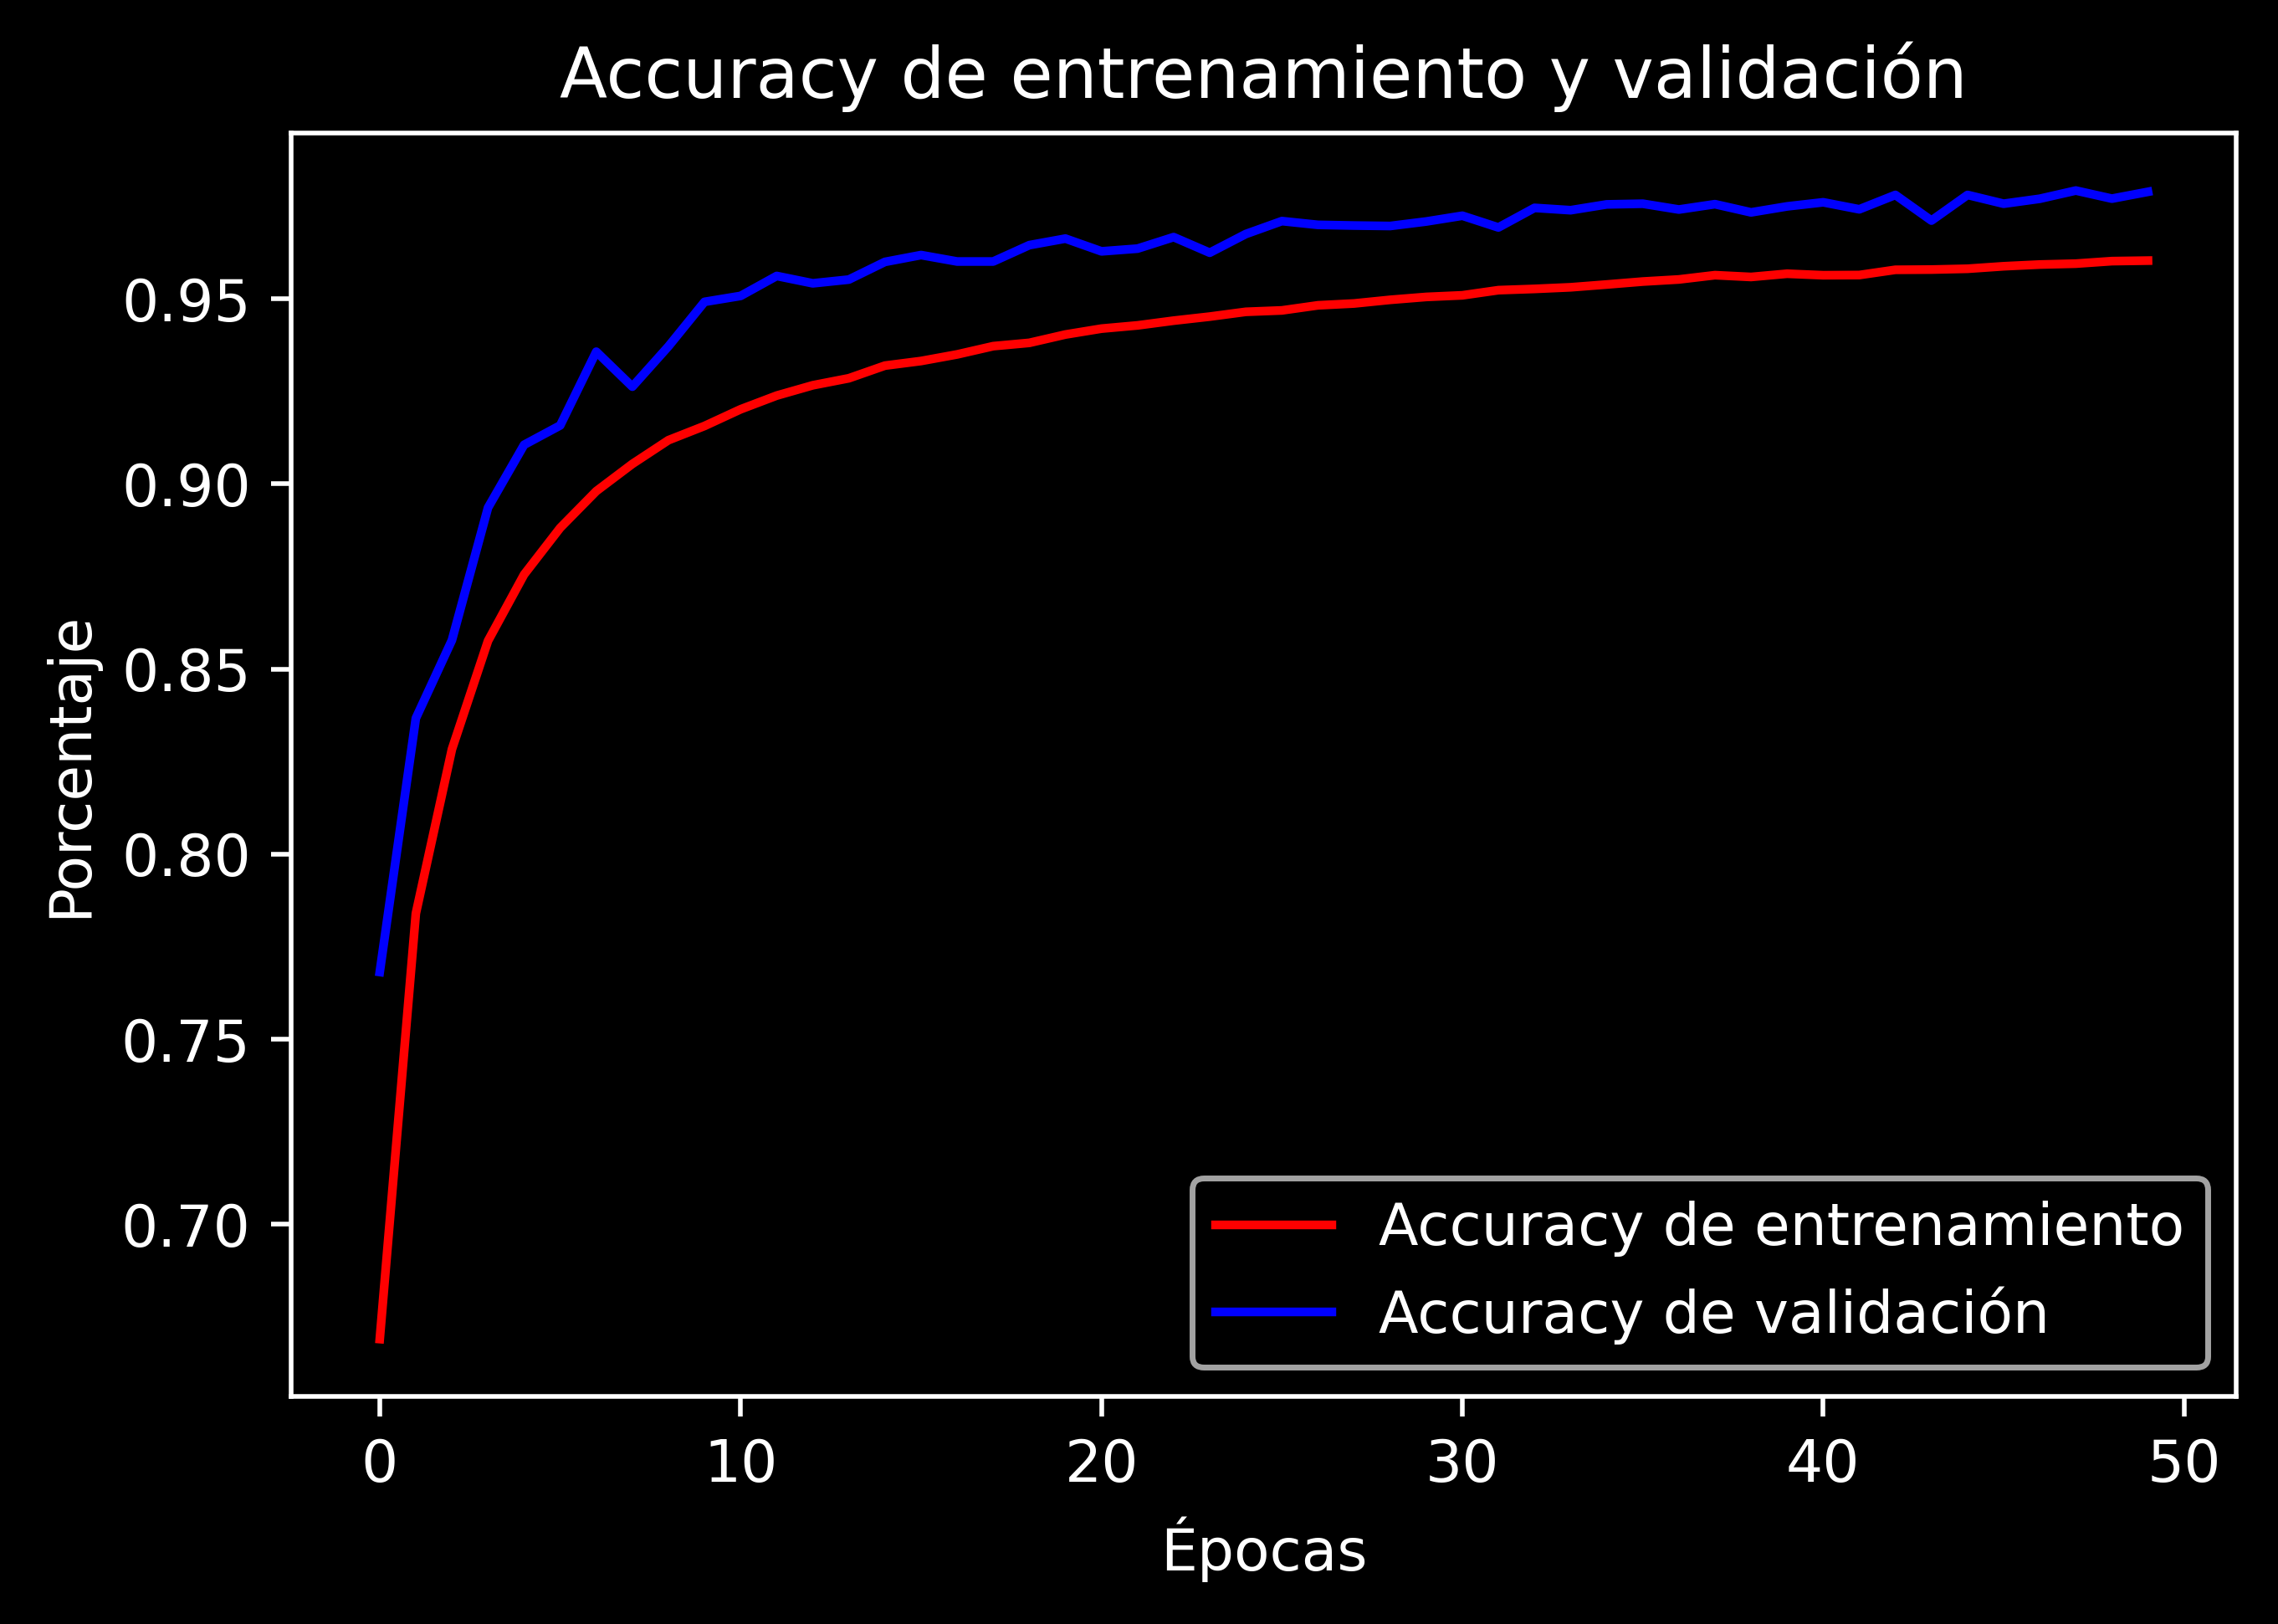

<Figure size 3000x2000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Porcentaje')

plt.legend(loc=0)
plt.figure()

plt.show()

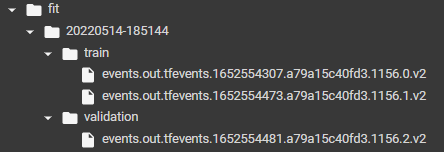

In [ ]:
# Tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

### 2.2.2 Clasifiación

In [ ]:
lim_inf=31500
lim_sup=33500
x= robi_df_escal_completo
y= robi_df['3 franjas']
x_train1, x_test1 ,y_train1, y_test1 = train_test_split( x , y , random_state=None, shuffle=False)
salidareal= y_test1[lim_inf:lim_sup]
forecast = []
a=lim_inf 

for time in range(lim_sup-lim_inf):
  # a=45000+time
  forecast.append(model_MLP_CNN.predict(x_test1[a+time:a+1+time]).argmax())
  # print(len(a))
# model.predict(x_train[a:a+1])

# x_train=x_train.reshape(194925,12,1)



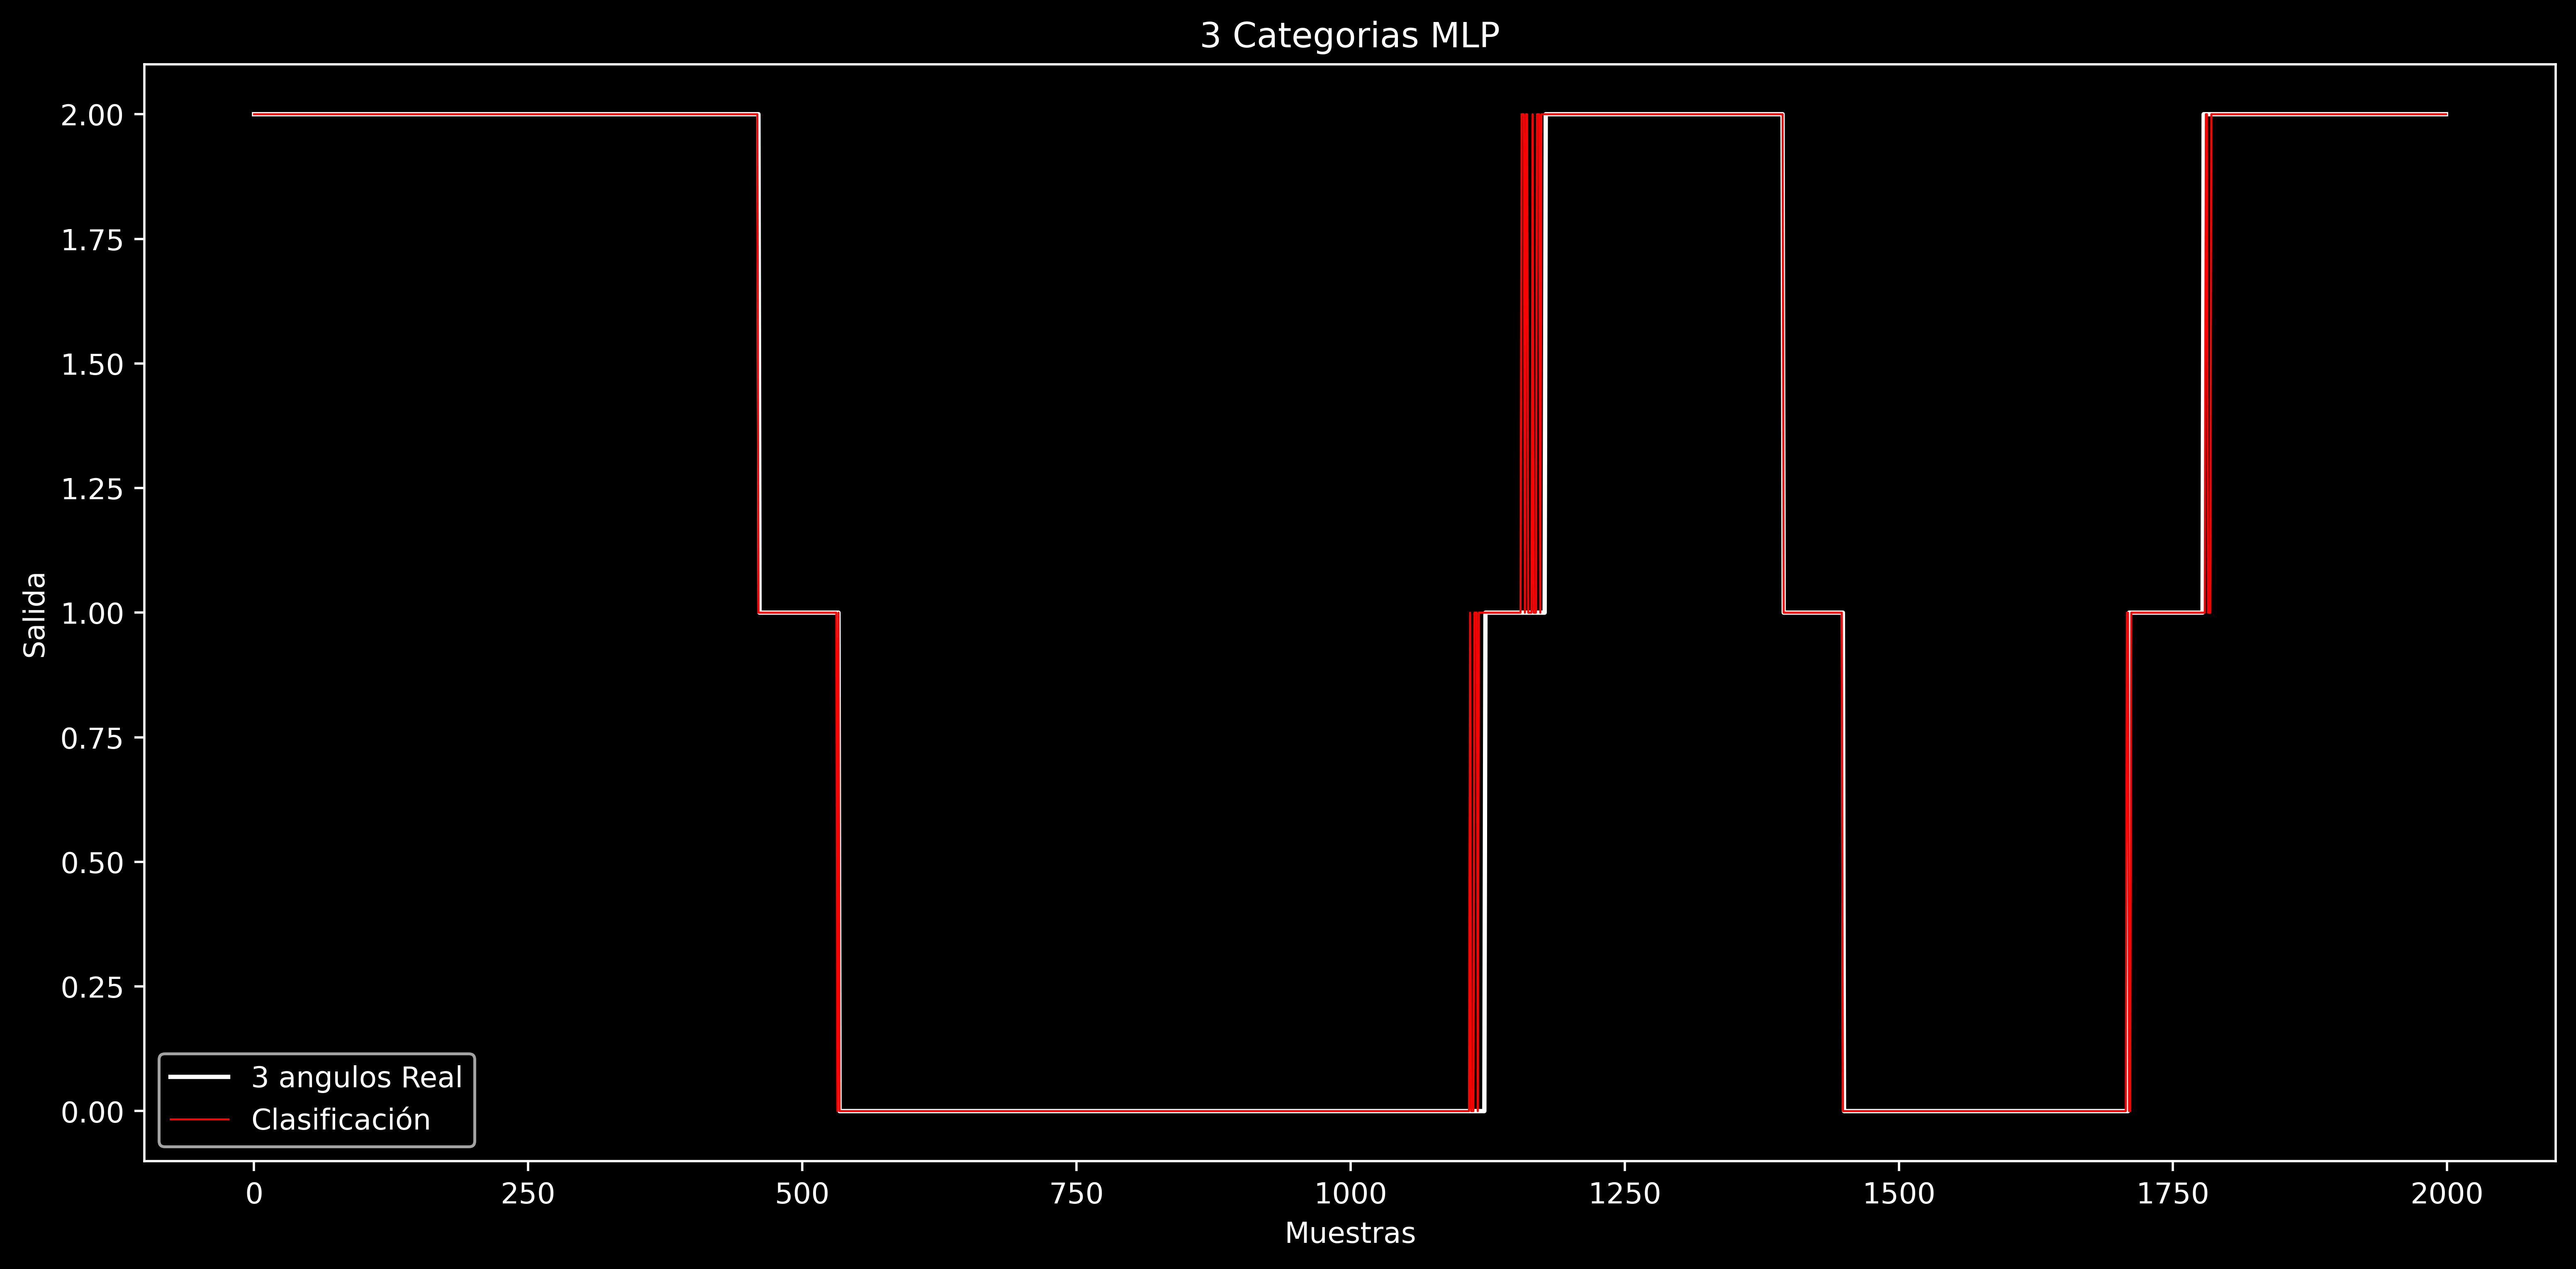

In [ ]:
plt.rcParams["figure.dpi"] = 500 #calidad de imagen


prediccion=np.array(forecast,dtype=float)
plt.figure(figsize=(15,7))
# plt.subplot(121)
plt.xlabel('Muestras')
plt.ylabel('Salida')
plt.title('3 Categorias MLP')

plt.plot(np.arange(0,lim_sup-lim_inf,1),salidareal,color='w', label='3 angulos Real')


# plt.subplot(122)
# plt.title('Regresión')
plt.plot(prediccion,color='r',linewidth=0.7, label= 'Clasificación')
plt.legend(loc=0)

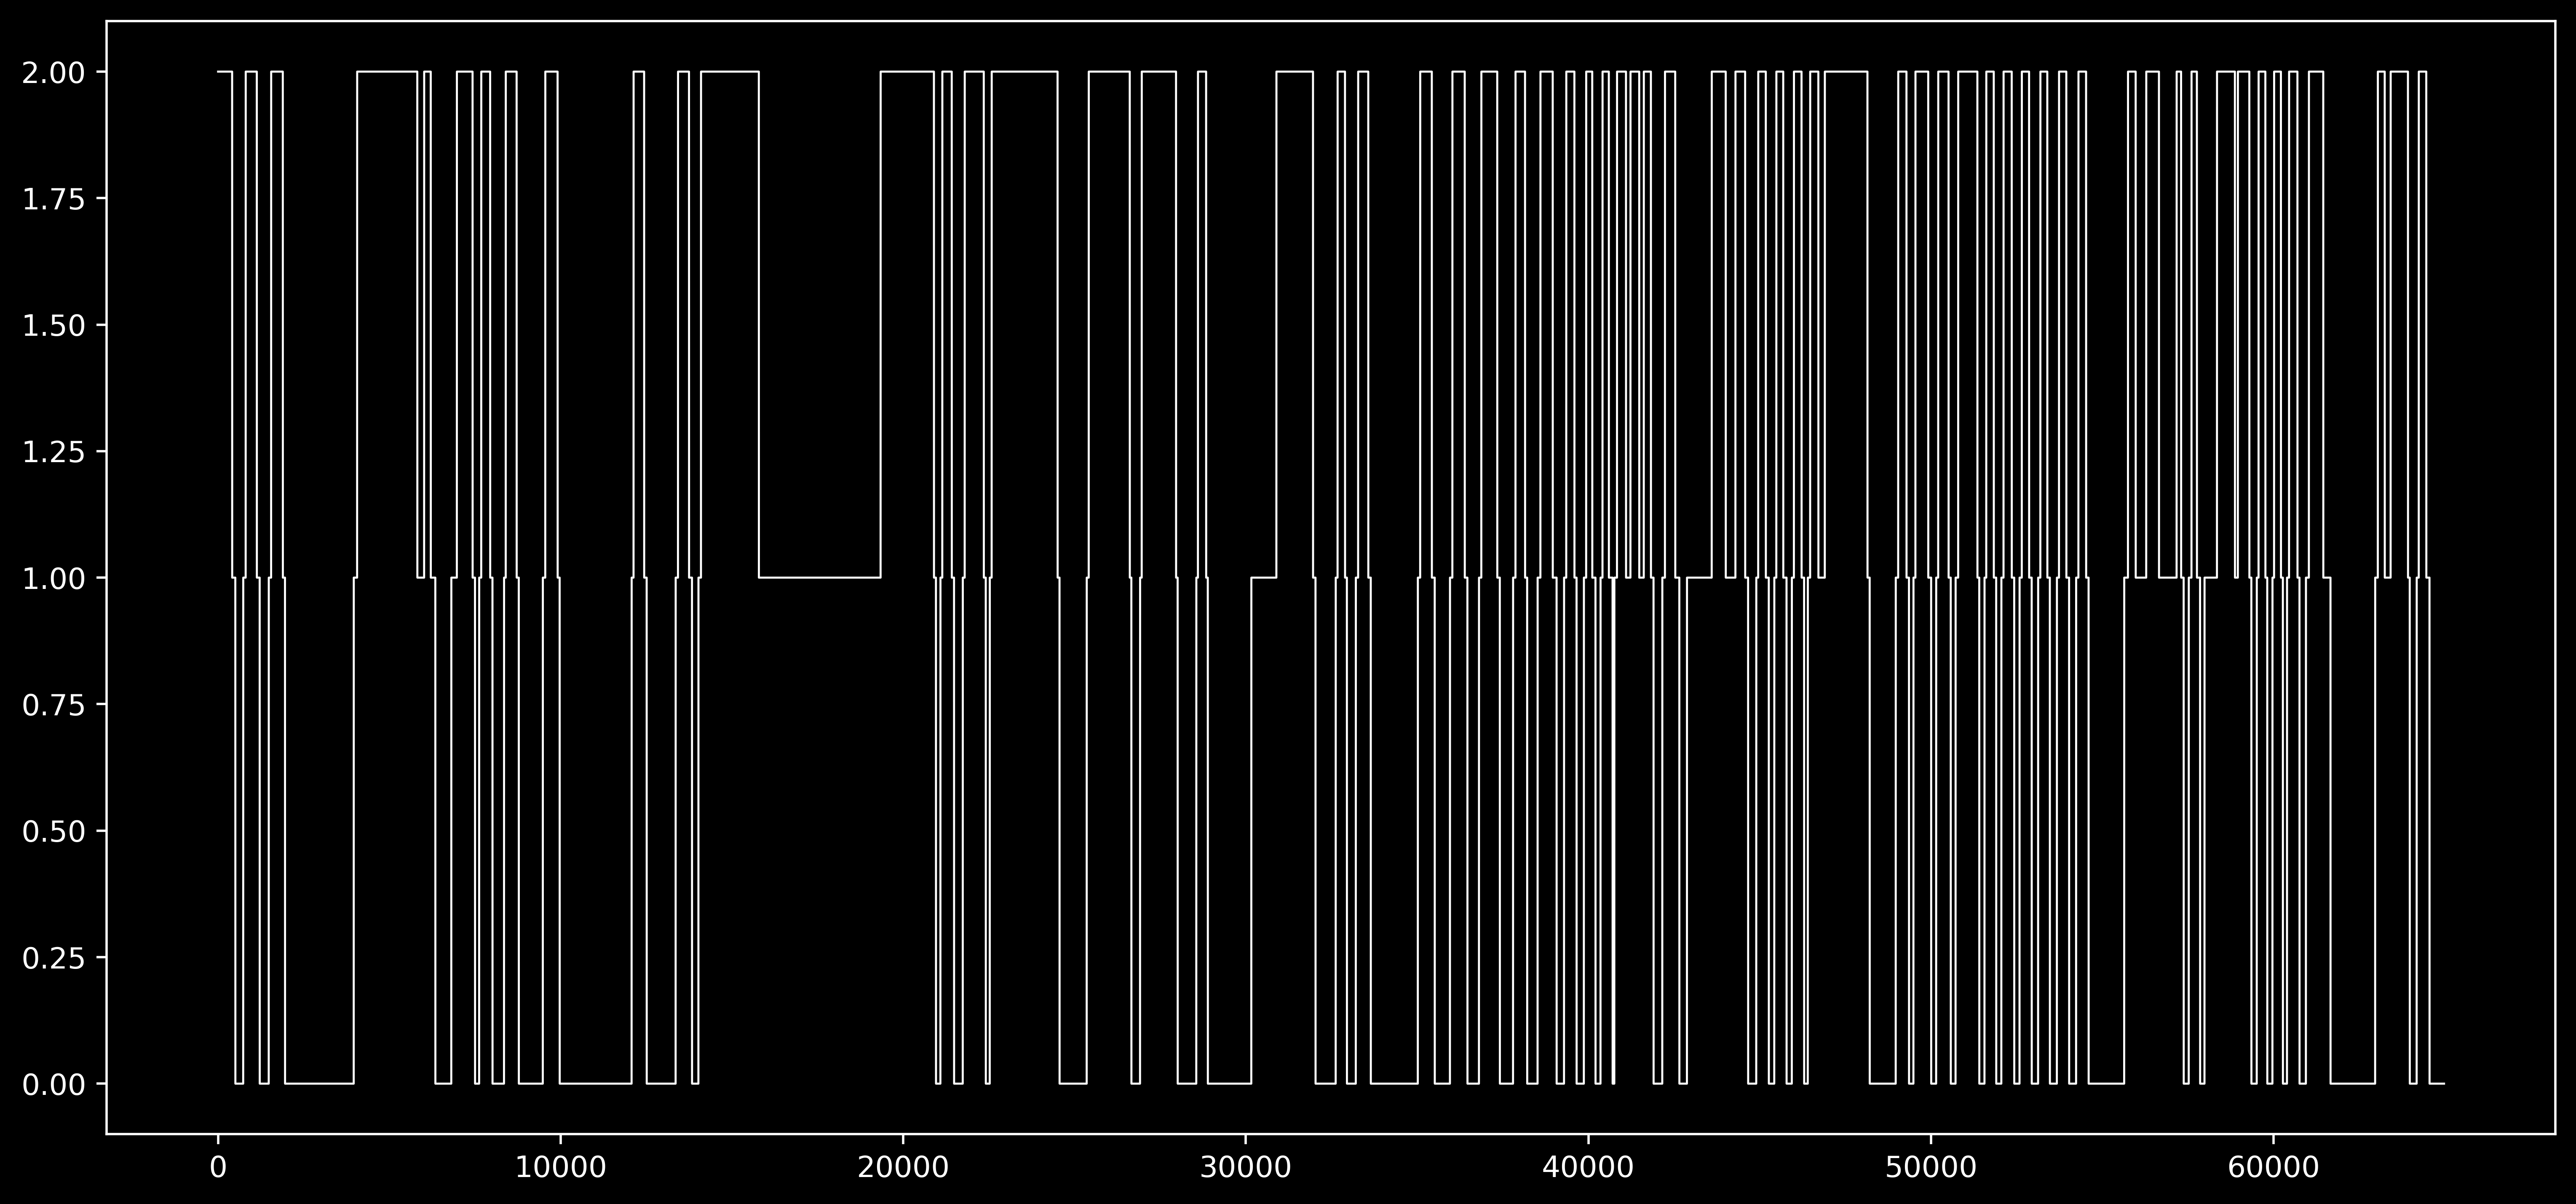

In [ ]:
plt.figure(figsize=(15,7))

plt.plot(np.arange(0,len(y_test1),1),y_test1,color='w',linewidth=0.7)

# y_test1

In [ ]:
# %%time
import time

start_time = time.process_time ()

with tf.device('/device:GPU:0'):
  model_MLP_CNN.predict(x_test1[5:6])

print(time.process_time () - start_time, "seconds con GPU")

start_time = time.process_time ()

with tf.device('/device:CPU:0'):
  model_MLP_CNN.predict(x_test1[5:6])

print(time.process_time () - start_time, "seconds con CPU")

0.06471020300000419 seconds con GPU
0.06840071899978284 seconds con CPU


In [ ]:
import time


start_time = time.process_time ()

with tf.device('/device:GPU:0'):
  model_MLP1.predict(x_test1[5:6])

print(time.process_time () - start_time, "seconds con GPU")

start_time = time.process_time ()

with tf.device('/device:CPU:0'):
  model_MLP1.predict(x_test1[5:6])

print(time.process_time () - start_time, "seconds con CPU")

0.08767491399999017 seconds con GPU
0.09117657600017992 seconds con CPU
